<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/Annmary_211_ETEIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1 - LSTM Autoencoder**

Import the necessary Libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import matplotlib.pyplot as plt

1. Load the dataset: The dataset will contain a single column temperature and a date column.

In [31]:
data = pd.read_csv('weather_data.csv')
data['date'] = pd.to_datetime(data['date'])
print(data.head(20))

         date  temperature
0  2014-01-01    10.248357
1  2014-01-02     9.950428
2  2014-01-03    10.362958
3  2014-01-04    10.820167
4  2014-01-05     9.961091
5  2014-01-06     9.980585
6  2014-01-07    10.906708
7  2014-01-08    10.520223
8  2014-01-09     9.921119
9  2014-01-10    10.446428
10 2014-01-11     9.962664
11 2014-01-12     9.980658
12 2014-01-13    10.353573
13 2014-01-14     9.294931
14 2014-01-15     9.407996
15 2014-01-16    10.008091
16 2014-01-17     9.801488
17 2014-01-18    10.483579
18 2014-01-19     9.890870
19 2014-01-20     9.657024


2. Preprocess the data: Normalize the temperature data and split it into training and testing
sets.

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['temperature_normalized'] = scaler.fit_transform(data[['temperature']])

# MinMaxScaler is used to normalize the 'temperature' column of the DataFrame.
# Normalization transforms the data to a specified range ( 0 to 1).

In [35]:
# Split into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data['temperature_normalized'][:train_size].values.reshape(-1, 1)
test_data = data['temperature_normalized'][train_size:].values.reshape(-1, 1)

In [36]:
timesteps = 30
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i:i + timesteps])
    return np.array(sequences)

X_train = create_sequences(train_data, timesteps)
X_test = create_sequences(test_data, timesteps)

3. Build an LSTM Autoencoder:
o The encoder should reduce the input dimensions to a latent representation.
o The decoder should reconstruct the input from the latent representation.

In [38]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(timesteps),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')

# An LSTM autoencoder is a type of neural network that uses LSTM layers to learn compressed representations of sequential data.
# It is an autoencoder because it's designed to reconstruct its input.


4. Train the model: Train the autoencoder on the training data and evaluate the
reconstruction error on the test set.

In [39]:
# Train the model
history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - loss: 0.1692 - val_loss: 0.0236
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0192 - val_loss: 0.0066
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0

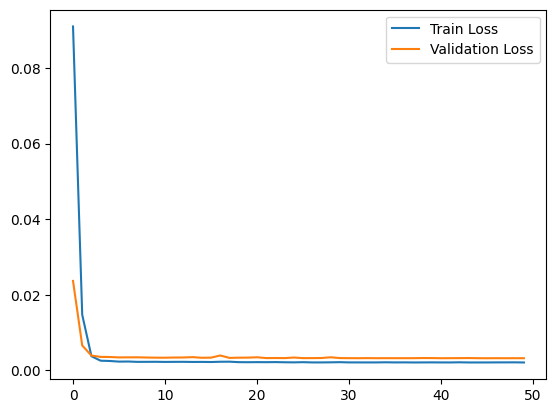

In [40]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [41]:
# Calculate reconstruction error
X_test_pred = model.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test_pred - X_test), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step


In [44]:
# MSE Error
mse_error = np.mean(np.square(X_test_pred - X_test))
print(f"Mean Squared Error (MSE): {mse_error}")

# MAE Error
mae_error = np.mean(np.abs(X_test_pred - X_test))
print(f"Mean Absolute Error (MAE): {mae_error}")

Mean Squared Error (MSE): 0.0017629600766618189
Mean Absolute Error (MAE): 0.031789584141101536


5. Anomaly Detection: Use the reconstruction error to detect anomalies. Define a threshold
for the reconstruction error, and identify days where the temperature is considered
anomalous.

In [45]:
# Define a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)  # Adjust as needed
anomalies = reconstruction_error > threshold

6. Visualize the results: Plot the original temperature data and highlight the detected
anomalies.

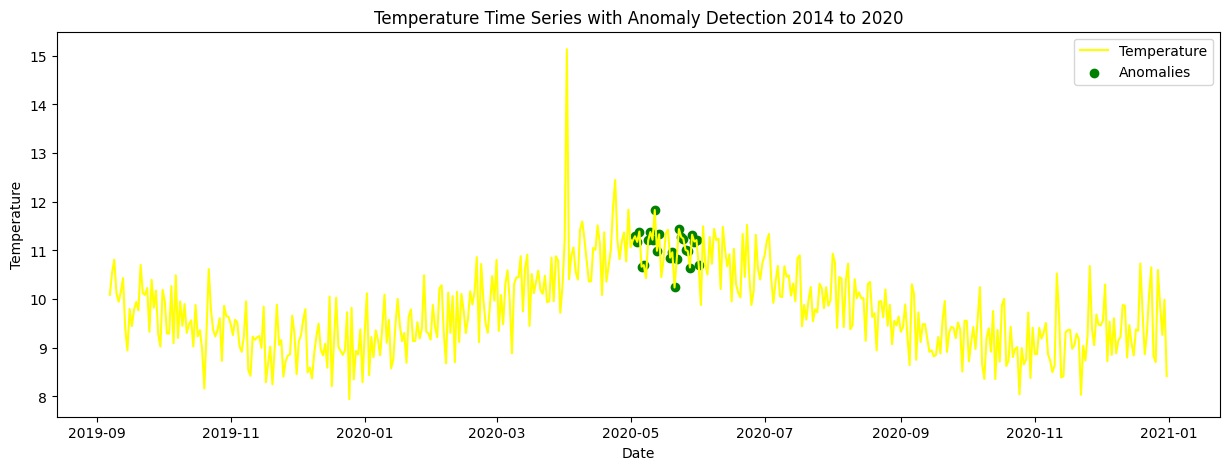

In [46]:
anomaly_indices = np.where(anomalies)[0]  # Get the indices of anomalies
anomaly_dates = test_dates.iloc[anomaly_indices + timesteps]  # Adjust by sequence offset
anomaly_temperatures = test_temperatures.iloc[anomaly_indices + timesteps]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, test_temperatures, color='yellow', label='Temperature')  # Set temperature color to yellow
plt.scatter(
    anomaly_dates,
    anomaly_temperatures,
    color='green',  # Set anomaly color to green
    label='Anomalies'
)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series with Anomaly Detection 2014 to 2020')  # Adding the graph title
plt.legend()
plt.show()


**Interpretation**



*   The code trains an LSTM autoencoder to learn the patterns in temperature time series data.  
*   It then uses the reconstruction error to identify anomalies—temperature readings that deviate significantly from the learned patterns.

*   The key idea is that the autoencoder will be good at reconstructing normal data, but
struggle with anomalous data, leading to higher reconstruction errors.  
*   The threshold determines how much deviation constitutes an anomaly.  The visualization helps interpret the results.


*   The provided code serves as a good starting point.  Performance adjustments and enhancements will depend largely on the characteristics of this dataset and the specific requirements for anomaly detection.


*   Experiment with different LSTM units, number of layers, `timesteps`, learning rate, and batch size to potentially improve performance.

*   After training, the model's ability to reconstruct the test data is evaluated using mean absolute error(MAE) and Mean Squared Error (MSE). Lower values indicate better performance; the model accurately recreates the input.









